# Get minutely load profiles
Author: Leander Kotzur

Date: 23.06.2017

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [49]:
import tsorb.utils.InputData as data
import tsorb.ElectricalLoadProfile as elp
import tsib.timeseriesmanager as tsm
import matplotlib.pyplot as plt
import copy

In [3]:
import tsam.timeseriesaggregation as tsam

Get weather data

In [4]:
try_data,location = tsm.readTRY()

### Validation for a single household

Init load profile generator

In [5]:
loadgen = elp.ElectricalLoadProfile(data.DataExchangeCsv(), 5, weather_data = try_data, resolved_load = True)

c:\users\l.kotzur\sciebo\fzj\01_fullstateeco\tsib\tsib\edemand\LoadModel.py:453: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  bulb_config=list(range(bulbs_number_rand_i))


Produce load for full year

In [6]:
total_load = loadgen.run_for_year(2010)

c:\users\l.kotzur\sciebo\fzj\01_fullstateeco\tsib\tsib\edemand\DPD.py:24: RuntimeWarning: invalid value encountered in double_scalars
  self._values[i] /= sum


Plot for a single day

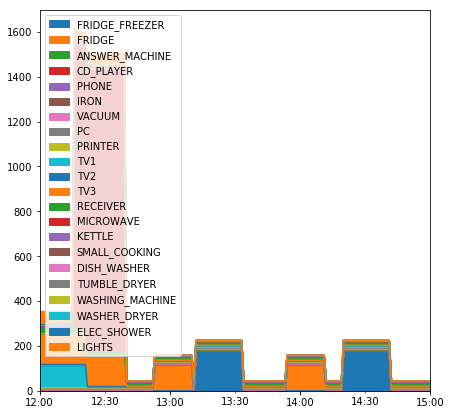

In [7]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111)
existingloads = loadgen.load_resolved.loc[:,(loadgen.load_resolved != 0).any(axis=0)]
existingloads['20100102 12:00':'20100102 15:00'].plot(kind = 'area', ax = ax)

Plot the cumulative values

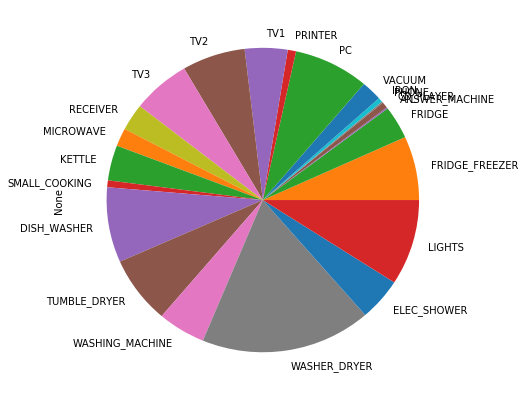

In [8]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111)
loadgen.load_resolved.sum().plot(kind = 'pie', ax = ax)

Plot the mean daily profile

In [50]:
dailyProfiles = tsm.groupToPeriods(copy.deepcopy(loadgen.load_resolved),1440)

In [10]:
meanday = dailyProfiles.mean().unstack().T
meanday = meanday.loc[:,(meanday != 0).any(axis=0)]

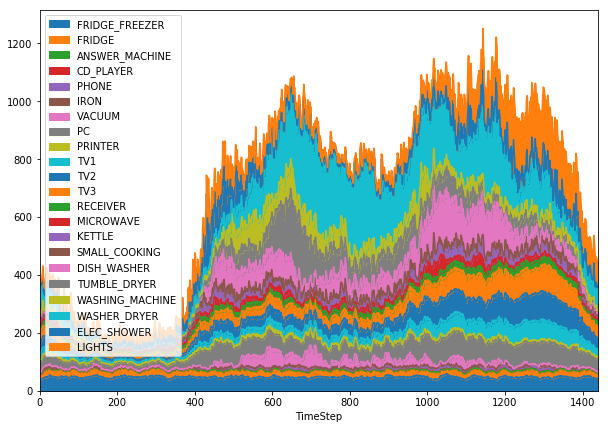

In [11]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
meanday.plot(kind = 'area', ax = ax)